In [50]:
import plotly.express as px
import shapely.geometry
import numpy as np
import wget
from matplotlib import pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [51]:
ipsRoutesTable = pd.read_csv("ipsRoutesTable.csv");
hopsLossRatioTable = pd.read_csv("hopsLossRatioTable.csv");
RTTDistributionTable = pd.read_csv("RTTDistributionTable.csv");

In [52]:
ipsRoutes = {}

for index, row in ipsRoutesTable.iterrows():
    routeID = row['ROUTE ID']
    ip = row['IP']
    lat = row['LAT']
    long = row['LONG']
    if routeID not in ipsRoutes:
        ipsRoutes[routeID] = {'IP':[],'LAT':[],'LONG':[]}
    ipsRoutes[routeID]['IP'].append(ip)
    ipsRoutes[routeID]['LAT'].append(lat)
    ipsRoutes[routeID]['LONG'].append(long)

In [53]:

fig = go.Figure()

for routeID, routeInfo in ipsRoutes.items():
    fig.add_trace(go.Scattermapbox(
        mode = "markers+lines",
        lon = routeInfo['LONG'],
        lat = routeInfo['LAT'],
        text = routeInfo['IP'],
        name = f"route {routeID}",
        marker = {'size': 5}))

fig.update_layout(
    width=950,
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': 10, 'lat': 10},
        'style': "stamen-terrain",
        'center': {'lon': -20, 'lat': -20},
        'zoom': 1})

fig.show()

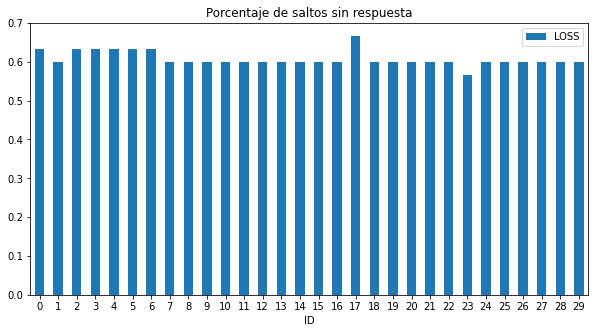

In [59]:
ax = hopsLossRatioTable.plot.bar(x='ID', y='LOSS', rot=0,figsize=(10,5), title='Porcentaje de saltos sin respuesta')

In [55]:
ipsRoutesTable

,ROUTE ID,IP,LAT,LONG
0,0,186.139.225.137,-34.5075,-58.4870
1,0,186.153.155.212,40.7143,-74.0060
2,0,4.68.37.222,32.5530,-92.0422
3,0,129.250.4.20,25.7743,-80.1937
4,0,129.250.2.219,32.7831,-96.8067
...,...,...,...,...
370,32,4.68.37.222,32.5530,-92.0422
371,32,129.250.4.20,25.7743,-80.1937
372,32,129.250.2.177,34.6937,135.5022
373,32,129.250.3.106,34.6937,135.5022


TypeError: 'str' object is not callable

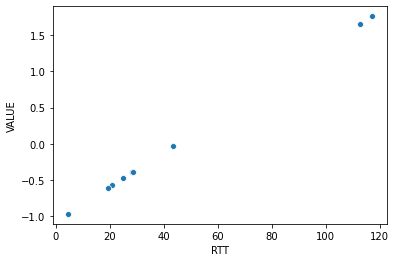

In [62]:
plt.scatter(data=RTTDistributionTable, x="RTT", y="VALUE")
sns.title('Distribucion de RTT standarizado')

In [57]:
RTTDistributionTable

,RTT,VALUE
0,21.001220,-0.568083
1,19.301089,-0.609270
2,4.526314,-0.967201
3,117.180617,1.761943
4,28.134950,-0.395262
5,43.402489,-0.025394
6,112.806487,1.655976
7,28.568331,-0.384763
8,25.134714,-0.467946
